When light enters a material with a refractinve index n, the wavelength shortens and become lambda/n. When a light enters an optical waveguide, its wavelength is shortended by a factor called the effective index. The effective index has a value that is intermediate between the values for the refractive index of the core and cladding materials.

The simulation below shows the optical intensity profile for light in a slab waveguide with a core index of 3.5 and cladding index of 3.2. It is tempting to guess that the effective index is the average refractive index experienced by the light.
Use the slider to vary the waveguide width.

Does the effective index change as you would expect if it were an average index?
Is it quantitatively equal to the weighted index?
If the effective index is not the weighted average, can you think of a reason why not?

In [26]:
# nbi:hide_in
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, ToggleButtons, interactive, HBox, VBox, Label
import time
plt.rcParams.update({'font.size': 16})

#core half thinkness in microns
gw_slider = FloatSlider(description='Guide Width', min=0.4, max=1.0, step=0.1, value=1.0);

#vacuum wavelength in microns
wavelength=1.55
#refractive index of core
n1=3.5
#refractive inex of cladding
n0=3.2

@interact(d=gw_slider)
def plot(d):
    global a
    a=d/2
    global Ka0
    global Ga0
    global x0
    global x1
    global x2
    #Finding the 1st Even Mode
    V=(2*np.pi*a/wavelength)*(n1**2.0-n0**2.0)**0.5
    Ka_arr = np.arange(80,100)/100.0
    Diff_arr = (n0**2/n1**2)*Ka_arr*np.tan(Ka_arr)-(V**2-Ka_arr**2)**0.5
    Diff_arr=np.absolute(Diff_arr)
    Ka0 = np.argmin(Diff_arr)/100.0+1.0
    Ga0 = (n0**2/n1**2)*Ka_arr[np.argmin(Diff_arr)]*np.tan(Ka_arr[np.argmin(Diff_arr)])
    Beta0 = ((n1*(2*np.pi/wavelength))**2-(Ka0/a)**2)**0.5  
    x0=np.linspace(-2,-a,151) 
    x1=np.linspace(-a,a,151) 
    x2=np.linspace(a,2,151)
    plt.plot(x0, (np.cos(Ka0)*np.exp((a+x0)*(Ga0/a)))**2,color='blue') 
    plt.plot(x1, np.cos(Ka0*x1/a)**2,color='blue') 
    plt.plot(x2, (np.cos(Ka0)*np.exp((a-x2)*(Ga0/a)))**2,color='blue')
    plt.xlabel('Position (micron)')
    plt.ylabel('Intensity')
    plt.vlines([-a,a],0, 1.0, colors='red')

    plt.text(-2.0,0.8,'ncore = '+ str(np.round(n0,1)))
    plt.text(-2.0,0.7,'nclad = '+ str(np.round(n1,1)))
    effn0 = Beta0*wavelength/2/np.pi
    plt.text(2.5,0.8,'Effective Index = '+ str(round(effn0,2)))
    conf = (np.sum((np.cos(Ka0*x1/a)**2))*(2*a)/(np.sum(np.cos(Ka0*x1/a)**2)*(2*a)
                + 2* np.sum((np.cos(Ka0)*np.exp((a-x2)*(Ga0/a)))**2)*(2-a)))
    plt.text(2.5,0.7,'Fraction of Light Confined to Core = '+ str(np.round(conf,2)))
    nave = n1*conf + n0*(1-conf)
    plt.text(2.5,0.6,'Weigthed Average of Index = '+ str(np.round(nave,2)))

interactive(children=(FloatSlider(value=1.0, description='Guide Width', max=1.0, min=0.4), Output()), _dom_cla…

In [4]:
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='Guide Width', max=1.0, min=0.4), Output()), _dom_cla…

In [5]:
interact(plot, d=gw_slider3)

interactive(children=(FloatSlider(value=1.0, description='Guide Width', max=1.0, min=0.4), Output()), _dom_cla…

<function __main__.plot(d)>

In [2]:
gw_slider2 = FloatSlider(description='Guide Width', min=0.4, max=1.0, step=0.1, value=1.0);
interactive_plot = interactive(plot, d=gw_slider2)
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
# interactive_plot

In [3]:
# nbi:hide_in
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, ToggleButtons, interactive, HBox, VBox, Label
import time
plt.rcParams.update({'font.size': 16})

#core half thinkness in microns
gw_slider3 = FloatSlider(description='Guide Width', min=0.4, max=1.0, step=0.1, value=1.0);

#vacuum wavelength in microns
wavelength=1.55
#refractive index of core
n1=3.5
#refractive inex of cladding
n0=3.2

def plot(d):
    global a
    a=d/2
    global Ka0
    global Ga0
    global x0
    global x1
    global x2
    #Finding the 1st Even Mode
    V=(2*np.pi*a/wavelength)*(n1**2.0-n0**2.0)**0.5
    Ka_arr = np.arange(80,100)/100.0
    Diff_arr = (n0**2/n1**2)*Ka_arr*np.tan(Ka_arr)-(V**2-Ka_arr**2)**0.5
    Diff_arr=np.absolute(Diff_arr)
    Ka0 = np.argmin(Diff_arr)/100.0+1.0
    Ga0 = (n0**2/n1**2)*Ka_arr[np.argmin(Diff_arr)]*np.tan(Ka_arr[np.argmin(Diff_arr)])
    Beta0 = ((n1*(2*np.pi/wavelength))**2-(Ka0/a)**2)**0.5  
    x0=np.linspace(-2,-a,151) 
    x1=np.linspace(-a,a,151) 
    x2=np.linspace(a,2,151)
    plt.plot(x0, (np.cos(Ka0)*np.exp((a+x0)*(Ga0/a)))**2,color='blue') 
    plt.plot(x1, np.cos(Ka0*x1/a)**2,color='blue') 
    plt.plot(x2, (np.cos(Ka0)*np.exp((a-x2)*(Ga0/a)))**2,color='blue')
    plt.xlabel('Position (micron)')
    plt.ylabel('Intensity')
    plt.vlines([-a,a],0, 1.0, colors='red')

    plt.text(-2.0,0.8,'ncore = '+ str(np.round(n0,1)))
    plt.text(-2.0,0.7,'nclad = '+ str(np.round(n1,1)))
    effn0 = Beta0*wavelength/2/np.pi
    plt.text(2.5,0.8,'Effective Index = '+ str(round(effn0,2)))
    conf = (np.sum((np.cos(Ka0*x1/a)**2))*(2*a)/(np.sum(np.cos(Ka0*x1/a)**2)*(2*a)
                + 2* np.sum((np.cos(Ka0)*np.exp((a-x2)*(Ga0/a)))**2)*(2-a)))
    plt.text(2.5,0.7,'Fraction of Light Confined to Core = '+ str(np.round(conf,2)))
    nave = n1*conf + n0*(1-conf)
    plt.text(2.5,0.6,'Weigthed Average of Index = '+ str(np.round(nave,2)))

In [33]:
import asyncio
from time import time

class Timer:
    def __init__(self, timeout, callback):
        self._timeout = timeout
        self._callback = callback
        self._task = asyncio.ensure_future(self._job())

    async def _job(self):
        await asyncio.sleep(self._timeout)
        self._callback()

    def cancel(self):
        self._task.cancel()

def throttle(wait):
    """ Decorator that prevents a function from being called
        more than once every wait period. """
    def decorator(fn):
        time_of_last_call = 0
        scheduled = False
        new_args, new_kwargs = None, None
        def throttled(*args, **kwargs):
            nonlocal new_args, new_kwargs, time_of_last_call, scheduled
            def call_it():
                nonlocal new_args, new_kwargs, time_of_last_call, scheduled
                time_of_last_call = time()
                fn(*new_args, **new_kwargs)
                scheduled = False
            time_since_last_call = time() - time_of_last_call
            new_args = args
            new_kwargs = kwargs
            if not scheduled:
                new_wait = max(0, wait - time_since_last_call)
                Timer(new_wait, call_it)
                scheduled = True
        return throttled
    return decorator

In [30]:
slider = FloatSlider()

@throttle(1)
def value_changed(change):
    u=2
slider.observe(value_changed, 'value')

slider

FloatSlider(value=0.0)

FloatSlider(value=1.0, description='Guide Width', max=1.0, min=0.4)

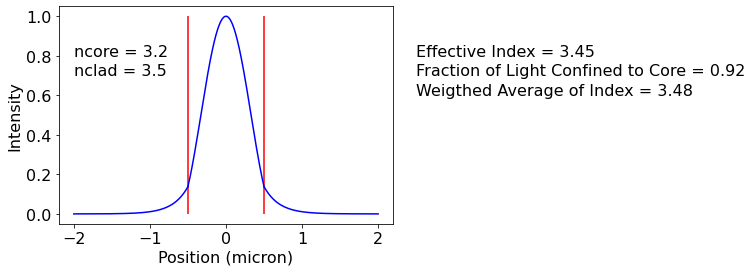

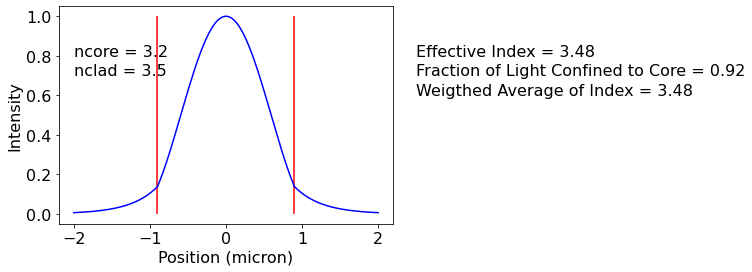

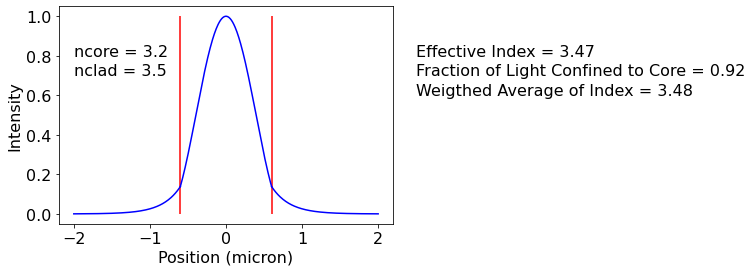

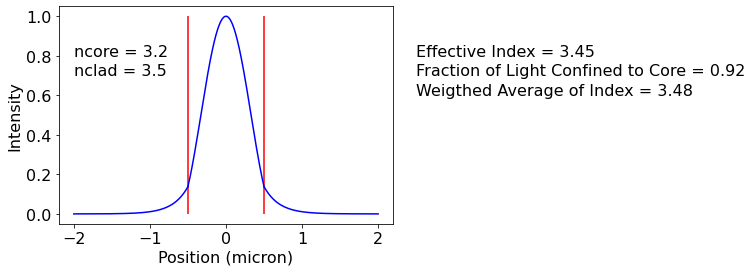

In [37]:
gw_slider4 = FloatSlider(description='Guide Width', min=0.4, max=1.0, step=0.1, value=1.0);
gw_slider4.observe(plot, 'value')

@throttle(1)
def plot(change):
    global a
    a=change['new']

    global Ka0
    global Ga0
    global x0
    global x1
    global x2
    
    #Finding the 1st Even Mode
    V=(2*np.pi*a/wavelength)*(n1**2.0-n0**2.0)**0.5
    Ka_arr = np.arange(80,100)/100.0
    Diff_arr = (n0**2/n1**2)*Ka_arr*np.tan(Ka_arr)-(V**2-Ka_arr**2)**0.5
    Diff_arr=np.absolute(Diff_arr)
    Ka0 = np.argmin(Diff_arr)/100.0+1.0
    Ga0 = (n0**2/n1**2)*Ka_arr[np.argmin(Diff_arr)]*np.tan(Ka_arr[np.argmin(Diff_arr)])
    Beta0 = ((n1*(2*np.pi/wavelength))**2-(Ka0/a)**2)**0.5  
    x0=np.linspace(-2,-a,151) 
    x1=np.linspace(-a,a,151) 
    x2=np.linspace(a,2,151)
    
    plt.plot(x0, (np.cos(Ka0)*np.exp((a+x0)*(Ga0/a)))**2,color='blue') 
    plt.plot(x1, np.cos(Ka0*x1/a)**2,color='blue') 
    plt.plot(x2, (np.cos(Ka0)*np.exp((a-x2)*(Ga0/a)))**2,color='blue')
    plt.xlabel('Position (micron)')
    plt.ylabel('Intensity')
    plt.vlines([-a,a],0, 1.0, colors='red')

    plt.text(-2.0,0.8,'ncore = '+ str(np.round(n0,1)))
    plt.text(-2.0,0.7,'nclad = '+ str(np.round(n1,1)))
    effn0 = Beta0*wavelength/2/np.pi
    plt.text(2.5,0.8,'Effective Index = '+ str(round(effn0,2)))
    conf = (np.sum((np.cos(Ka0*x1/a)**2))*(2*a)/(np.sum(np.cos(Ka0*x1/a)**2)*(2*a)
                + 2* np.sum((np.cos(Ka0)*np.exp((a-x2)*(Ga0/a)))**2)*(2-a)))
    plt.text(2.5,0.7,'Fraction of Light Confined to Core = '+ str(np.round(conf,2)))
    nave = n1*conf + n0*(1-conf)
    plt.text(2.5,0.6,'Weigthed Average of Index = '+ str(np.round(nave,2)))


gw_slider4